In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn import metrics, preprocessing
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [3]:
data = pd.read_csv("madfhantr.csv")

In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


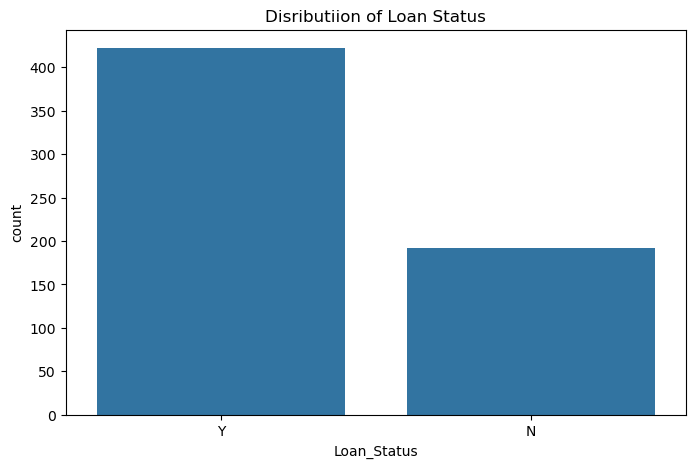

In [6]:
plt.figure(figsize=(8,5))
sns.countplot(x='Loan_Status',data = data)
plt.title('Disributiion of Loan Status')
plt.show()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
numerical_cols = ['LoanAmount','Loan_Amount_Term','Credit_History']
categorical_cols = ['Gender','Married','Dependents','Self_Employed']

In [11]:
numerical_imputer = SimpleImputer(strategy = 'mean')
categorical_imputer = SimpleImputer(strategy = 'most_frequent')

In [14]:
data[numerical_cols] =  numerical_imputer.fit_transform(data[numerical_cols])
data[categorical_cols] =  categorical_imputer.fit_transform(data[categorical_cols])


In [15]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [54]:
X = data.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = data['Loan_Status']

In [55]:
X = pd.get_dummies(X)

In [56]:
label_encoder = preprocessing.LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [59]:
clf = DecisionTreeClassifier()

In [60]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [63]:
y_pred = clf.predict(X_test)

In [64]:
y_pred_labels = label_encoder.inverse_transform(y_pred)

In [65]:
print("Unique classes in label_encoder:", label_encoder.classes_)

Unique classes in label_encoder: ['N' 'Y']


In [46]:
accuracy = metrics.accuracy_score(y_test,y_pred)

In [47]:
print(f"Accuracy : {accuracy}")

Accuracy : 0.7073170731707317


In [66]:
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

In [67]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.7154471544715447
Precision: 0.7647058823529411
Recall: 0.8125
F1 Score: 0.787878787878788


In [68]:
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[23 20]
 [15 65]]


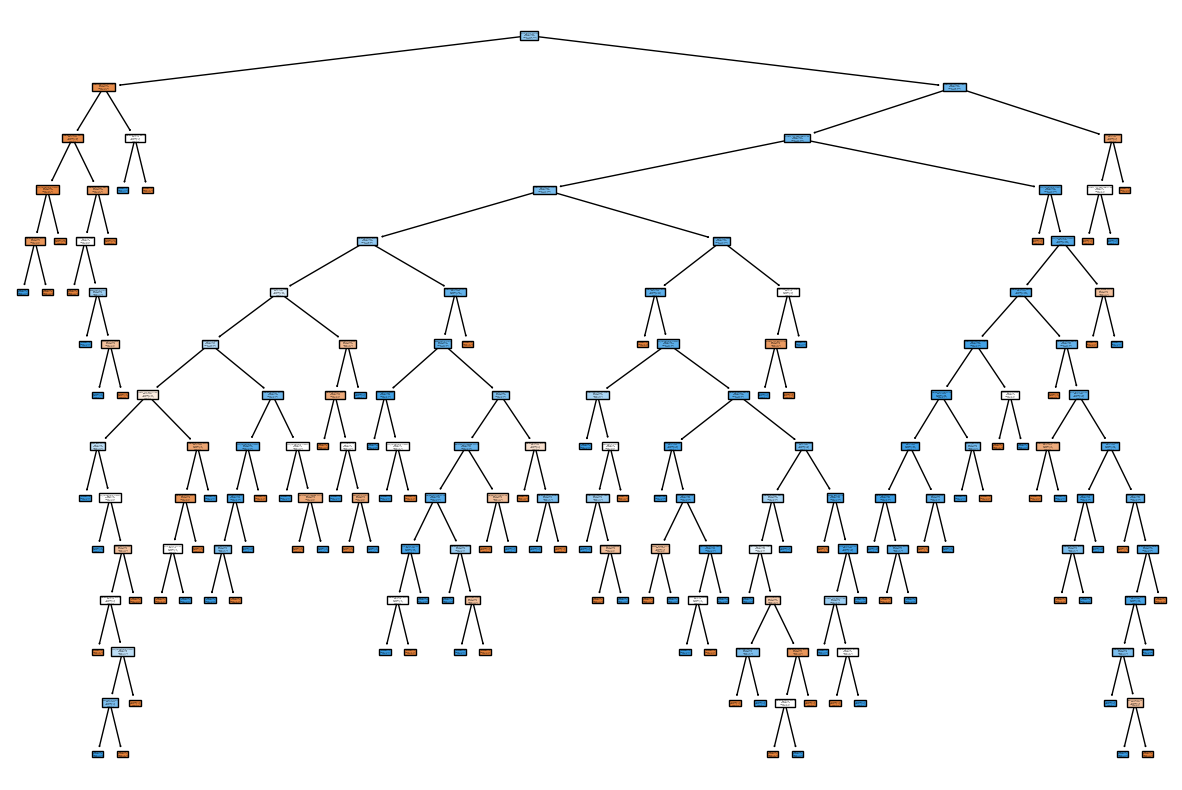

In [69]:
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=label_encoder.classes_)
plt.show()